In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
file_path='C:/GitHub/crawl-and-analyze-marks/diemThiHaNoi.csv'
data=pd.read_csv(file_path)
data=data.drop(columns=['sbd'])
data=data.replace(np.nan,0,inplace=False)

In [84]:
data.head()

,Toan,Van,NgoaiNgu,VatLy,HoaHoc,SinhHoc,TBKHTN,LichSu,DiaLy,GDCD,TBKHXH
0,8.4,6.75,8.0,6.0,5.25,5.0,5.42,0.00,0.00,0.00,0.00
1,8.6,8.50,7.2,0.0,0.00,0.0,0.00,7.25,6.00,8.00,7.08
2,8.2,8.75,8.2,0.0,0.00,0.0,0.00,7.25,7.25,8.75,7.75
3,4.8,8.50,7.4,0.0,0.00,0.0,0.00,7.00,6.00,7.50,6.83
4,8.6,9.00,7.8,0.0,0.00,0.0,0.00,9.00,8.75,8.50,8.75


In [85]:
scaler=StandardScaler()
data_sc=scaler.fit_transform(data)

#PCA


In [86]:
from sklearn.decomposition import PCA

In [87]:
hung=PCA(n_components=2)
data_pca=hung.fit_transform(data_sc)



#elbow method


In [88]:
from scipy.spatial.distance import cdist

In [89]:
distortions=[]
inertias=[]
mapping1={}
mapping2={}
K=range(1,10)

for k in K:
    kmean=KMeans(n_clusters=k).fit(data_pca)
    kmean.fit(data_pca)

    distortions.append(sum(np.min(cdist(data_pca,kmean.cluster_centers_,'euclidean'),axis=1))/data_pca.shape[0])
    inertias.append(kmean.inertia_)
    mapping1[k]=sum(np.min(cdist(data_pca,kmean.cluster_centers_,'euclidean'),axis=1))/data_pca.shape[0]
    mapping2[k]=kmean.inertia_


In [90]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.8442955131955334
2 : 1.3135354042502418
3 : 0.8967422706495484
4 : 0.7393930960161458
5 : 0.6737222934726786
6 : 0.6245801574562998
7 : 0.5966685164134363
8 : 0.5462130590737316
9 : 0.5073620242611383


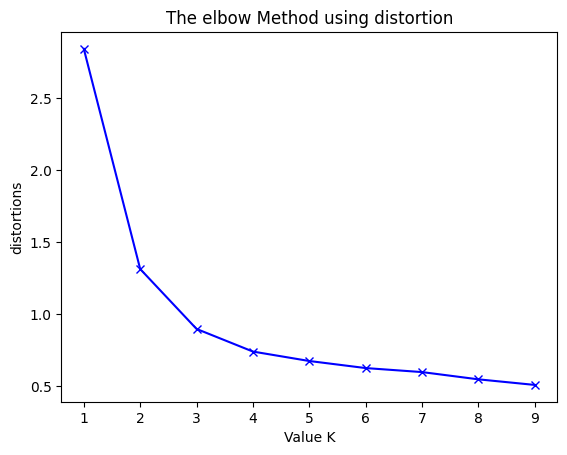

In [91]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Value K')
plt.ylabel('distortions')
plt.title('The elbow Method using distortion')
plt.show()

We can see from the graph that the best k for this is 3 

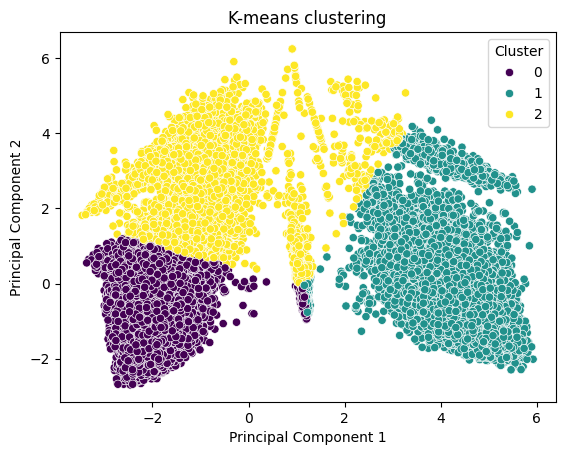

In [92]:
kmean=KMeans(n_clusters=3,random_state=42) 
kmean.fit(data_pca)
data['Cluster']=kmean.labels_

sns.scatterplot(x=data_pca[:,0],y=data_pca[:,1],hue=data['Cluster'],palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clustering')
plt.show()